# Topic 42 - Tuning Neural Networks + Deep NLP (with Google Colab!)- **Study Group Copy**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1chdjtnh7ubRMDD5H8ksTAjCDZGnbExik?usp=sharing)


- 06/09/21
- onl01-dtsc-ft-022221

## Announcements

- Topic 35: **hold off on installing Docker and running topic 35 locally** for now.
    - Getting info from the campus team/Central Lecturer how to run everything in the cloud with DataBricks instead. 


- Topic 36 study group is **tomorrow**:
    - Only the last lab of Topic 36 requires pyspark/docker

## Colab Notebook Key

- 📚: Info sections
- 🕹: Activity sections
    - 🎛: hyperparameters to tune
    - 🏋️: fitting models
    - 🤔: New Things to Potentially Try 
- Use the Table of Contents view on the left sidebar to find the relevant sections (button looks like a bulleted list)

## 📚 Google Colab Overview

**Google Colab Quick - Notes**
 1. **Open the sidebar!**
    - Use `Table of Contents` to Jump between the 3 major sections.
    - Mount your google drive via the `Files `
    - Note: **to make a section appear in the Table of Contents, create a NEW text cell for the *header only*.** This will also let you collapse all of the cells in the section to reduce clutter.

2. **Google Colab already has most common python packages.**
    - You can pip install anything by prepending an exclamation point
    - You can use the `IPython.display` function `clear_output` to programmatically clean up the displays from pip installation.
    ``` python
    !pip install fsds_100719
    !pip install fake_useragent
    !pip install lxml
    from IPython.display import clear_output
    clear_output()

    %conda install ....
    ```
    


3. **Using GPUs/TPUs**
    - `Runtime > Change Runtime Type > Hardware Acceleration`

4. **Run-Before and Run-After**
    - Go to `Runtime` and select `Run before` to run all cells up to the currently active cell
    - Go to `Runtime` and select `Run after` to run all cells that follow the currently active cell 

5. **Cloud Files with Colab**
    - **Open .csv's stored in a github repo directly with Pandas**:
        - Go to the repo on GitHub, click on the csv file, then click on `Download` or `Raw` which will then change to show you the raw text. Copy and paste the link in your address bar (should start with www.rawgithubusercontent).
        - In your notebook, do `df=pd.read_csv(url)` to load in the data.
    - **Google Drive: Open sidebar > Files> click Mount Drive**
        - or use this function (also available from file sidebar): 
        ```python 
        ## Mount Google Drive
        from google.colab import drive
        drive.mount('/gdrive',force_remount=True)
        ```
        - Then access files by file path like usual.
        
    - Dropbox Files: (like images or csv)
        - Copy and paste the share link.
        - Change the end of the link from `dl=0`to `dl=1`
    - Note: for some data types (like.sqlite) the only option is to store them in google drive and then mount google drive using the Files tab of the sidebar.



In [11]:
import pandas as pd
pd.read_csv('https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_4/topic_42_tuning_neural_networks/data/stack_overflow.csv.gz?raw=true',
            compression='gzip')

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [12]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [13]:
# with open('/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat '/gdrive/My Drive/foo.txt'



6. **Keyboard Shortcuts**
    - A lot of the keyboard shortcuts for Colab are different.
        - Auto-Complete is Control+Space
        - Control+Shift+Space for docstrings.
    - Most keyboard shortcuts can be changed
        - go to `Tools`>`Keyboard Shortcuts`

    - Some of the keyboard shortcuts are the same BUT you first have to type `Command/Cntrl + M` and THEN the keyboard shortcut. 
        - e.g. `Cmd/Cntrl+M  Y` will change a cell to a code cell
        -  `Cmd/Cntrl+M  M` will change a code cell to a Markdown cell.


7. **GitHub Integration**
    
    3. Open a notebook from github or save to github using `File > Upload Notebook` and `File> Save a copy in github`, respectively
        - Notebooks saved to Github can optionally have a "Open in Colab" link inserted at the top of the notebook. 
    - You can open notebooks contained in GitHub repositories use the File menu.
        - `File`>`Open`> `GitHub tab`
    - You can save a copy of notebooks in GitHub repositories 
        - `File`> `Save a copy in GitHub`
    - When you are done working for the day/want to back up the current state of your notebook:
        - `File` > `Save and Pin Revision`
        - This will save a revision that you could revert back to later (like a commit)
    - **See the following example notebook from Google:**
        - https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb 

    

8. **You cannot easily clone an entire repository.**
    - It is possible, but you have to do it from WITHIN a Colab notebook. 
    - **See the following resources for additional info on using Colab + GitHub**:
        - https://towardsdatascience.com/google-drive-google-colab-github-dont-just-read-do-it-5554d5824228 

                    
9. **Load in images stored in a GitHub Repo for Markdown cells:**
    - Go to Repo on GitHub.com, click on image file name.
    - On the next page for the file, there should be a `Download` button. Click this. 
    - A new tab should open up with the raw image and the url should now read `raw.githubusercontent.com`. 
    - Copy this url, it can be used with Markdown cells using img tags. 

10. **Consider paying for Colab Pro if you need faster processing and more RAM**

___

# Original Topic 42 Notebook Continued

## Learning Objectives

- Learn about Word Embeddings.
    - Discuss word Embeddings and their advantages
    - Training Word2Vec models
    - ~~Using pretrained word embeddings~~ [Another time]
    
- Learn about Sequence Models and Recurrent Neural Networks
    - LSTMs with word embeddings. 
    
    
- Activity: Predicting Stack Overflow post quality. 

- Learn about Tuning Neural Networks
    - Discuss the different options available for tuning neural networks

    - Discuss some rules of thumb for tuning Neural Networks

    - Learn how to use GridSearchCV with Keras neural neural networks.

    - ~~Learn how to create your own custom scorer for sklearn (and why you'd want to)~~

## Questions

- What is an exploding Gradient?
- Do we have the ability to set max weights?


# Appendix Topic: Deep Natural Language Processing

## Review: NLP & Word Vectorization

> - As a reminder, machine learning models needed text to be converted to numbers ("vectorization") before training the model. 
    - We used frequency counts or tf-idf values to produce numeric values for each word. 
    - We trained the models to look for the presence/absence of words to classify texts.

# 📚 Word Embeddings

- Word embeddings are vectorized words representing their **semantic meaning**.
- They are created with an arbitrary length (typically 100 points).


- Convert words into a vector space
    - Each word gets its own unique vector. 
    - Vectors capture how similar various words are.
   

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/vectors.png">

>- Once we have word embeddings, we can actually identify related words based on meaning. 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/embeddings.png">

## Resources

- [How Embeddings are Created](https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/natural-language-processing/word2vec)
- [Creating Word Embeddings: Coding the Word2Vec Algorithm in Python using Deep Learning](https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8)
- Kaggle Tutorial:  https://www.kaggle.com/learn/embeddings
- Google Embedding Crash Course: https://developers.google.com/machine-learning/crash-course/embeddings

## Word2Vec

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/training_data.png">

### Skip-Gram Model

- Train the MLP to find the best weights (context) to map word-to-word
- But since words close to another usually contain context, we're _really_ teaching it context in those weights
- Gut check: similar contexted words can be exchanged
    + EX: "A fluffy **dog** is a great pet" <--> "A fluffy **cat** is a great pet"

- By training a text-generation model, we wind up with a lookup table where each word has its own vector 

- Resource: 
    - [skip-gram vs CBOW methods](https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314)

#### How to create an emebding:
- Resources:
    - [How Embeddings are Created](https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/natural-language-processing/word2vec)
    - [Creating Word Embeddings: Coding the Word2Vec Algorithm in Python using Deep Learning](https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8)


- To create a word embedding, we train a shallow neural network for a fake task. 

    - The fake task is to use one-hot-encoded text data to then predict the probability of seeing every other word in the corpus within the same context as the one-hot-encoded word.
    

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/new_skip_gram_net_arch.png">


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-using-word2vec-online-ds-ft-100719/master/images/new_word2vec_weight_matrix_lookup_table.png">

## GloVe - Global Vectors for Word Representation

### Transfer Learning

- Usually embeddings are hundreds of dimensions
- Just use the word embeddings already learned from before!
    + Unless very specific terminology, context will likely carry within language
- Comparable to CNN transfer learning

# 🕹 **Activity: Creating our own word embeddings**

### Data: Stack Overflow Questions

- Stack Overflow Answers: https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate


- Kaggle Description:
    - We collected 60,000 Stack Overflow questions from 2016-2020 and classified them into three categories:

        - HQ: High-quality posts with a total of 30+ score and without a single edit.
        - LQ_EDIT: Low-quality posts with a negative score, and multiple community edits. However, they still remain open after those changes.
        - LQ_CLOSE: Low-quality posts that were closed by the community without a single edit.

In [14]:
# !pip install -U fsds
from fsds.imports import *

In [15]:
from tensorflow.random import set_seed
set_seed(321)

import tensorflow as tf
print(tf.__version__)

import numpy as np 
np.random.seed(321)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys

plt.rcParams['figure.figsize'] = [8,4]

2.5.0


In [16]:
## Get data from github
url ='https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_4/topic_42_tuning_neural_networks/data/stack_overflow.csv.gz?raw=true'
df = pd.read_csv(url,compression='gzip')

In [17]:
df['Y'].value_counts()

HQ          15000
LQ_EDIT     15000
LQ_CLOSE    15000
Name: Y, dtype: int64

### Dealing with HTML Tags

- First, should we remove them?
- If yes, use beautiful soup?

In [18]:
## Getting text example for dealing with html tags
test_body = df.loc[4,'Body']
test_body

'<p>I\'m using custom floatingactionmenu. I need to implement scale animation on show/hide menu button like here\n<a href="https://material-design.storage.googleapis.com/publish/material_v_4/material_ext_publish/0B6Okdz75tqQsZU1kZWhRYWZpUDg/components-buttons-fab-behavior_01_xhdpi_012.mp4" rel="noreferrer">floating action button behaviour</a></p>\n\n<p>Is there any way to do this ?</p>\n'

In [19]:
from bs4 import BeautifulSoup
test_soup = BeautifulSoup(test_body)
test_soup.text

"I'm using custom floatingactionmenu. I need to implement scale animation on show/hide menu button like here\nfloating action button behaviour\nIs there any way to do this ?\n"

In [20]:

df['soups'] = df['Body'].map(lambda x:BeautifulSoup(x).text )
df

,Id,Title,Body,Tags,CreationDate,Y,soups
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...
...,...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE,I am new to this and I am asking for help to c...
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE,I am working on learning Python and was wonder...
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE,It looks like it costs 8 days per month in Azu...
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE,"""I _____ any questions.""\nI want to implement ..."


In [21]:
## join together title and body. 
df['text'] = df['Title']+'; '+df['soups']
df

,Id,Title,Body,Tags,CreationDate,Y,soups,text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...,Java: Repeat Task Every Random Seconds; I'm al...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...,Why are Java Optionals immutable?; I'd like to...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...,Text Overlay Image with Darkened Opacity React...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ...",Why ternary operator in swift is so picky?; Th...
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...,hide/show fab with scale animation; I'm using ...
...,...,...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE,I am new to this and I am asking for help to c...,Convert List<String> to string C# - asp.net - ...
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE,I am working on learning Python and was wonder...,Does Python execute code from the top or botto...
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE,It looks like it costs 8 days per month in Azu...,how to change payment date in Azure?; It looks...
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE,"""I _____ any questions.""\nI want to implement ...","how to implement fill in the blank in Swift; ""..."


## Creating Word Embeddings with `Word2Vec`

### Resources:

- Two Part Word2Vec Tutorial  (linked from Canvas)
    - [Part 1: The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
    - [Part 2: Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)
    
- White Paper on word2vec (downloads file):
    - https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf


- `sentences`: dataset to train on
- `size`: how big of a word vector do we want
- `window`: how many words around the target word to train with
- `min_count`: how many times the word shows up in corpus; we don't want words that are rarely used
- `workers`: number of threads (individual task "workers")

```python
from gensim.models import Word2Vec

model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count)

```

<!-- 
#### Word2Vec params

```python
## For initializing model
sentences=None,
    size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    iter=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    
    
## For training 
    sentences,
    total_examples=None,
    total_words=None,
    epochs=None,
    start_alpha=None,
    end_alpha=None,
    word_count=0,
    queue_factor=2,
    report_delay=1.0,
    compute_loss=False,
    callbacks=(),
``` -->

In [22]:
## NLP imports
from nltk import word_tokenize, TweetTokenizer, regexp_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import gensim
print(gensim.__version__)

from sklearn.model_selection import train_test_split

3.6.0


In [23]:
## use gensim's simple preprocess
df['cleaned-text'] = df['text'].map(lambda x: simple_preprocess(x, deacc=True))
df

,Id,Title,Body,Tags,CreationDate,Y,soups,text,cleaned-text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,I'm already familiar with repeating tasks ever...,Java: Repeat Task Every Random Seconds; I'm al...,"[java, repeat, task, every, random, seconds, a..."
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,I'd like to understand why Java 8 Optionals we...,Why are Java Optionals immutable?; I'd like to...,"[why, are, java, optionals, immutable, like, t..."
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,I am attempting to overlay a title over an ima...,Text Overlay Image with Darkened Opacity React...,"[text, overlay, image, with, darkened, opacity..."
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"The question is very simple, but I just could ...",Why ternary operator in swift is so picky?; Th...,"[why, ternary, operator, in, swift, is, so, pi..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,I'm using custom floatingactionmenu. I need to...,hide/show fab with scale animation; I'm using ...,"[hide, show, fab, with, scale, animation, usin..."
...,...,...,...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE,I am new to this and I am asking for help to c...,Convert List<String> to string C# - asp.net - ...,"[convert, list, string, to, string, asp, net, ..."
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE,I am working on learning Python and was wonder...,Does Python execute code from the top or botto...,"[does, python, execute, code, from, the, top, ..."
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE,It looks like it costs 8 days per month in Azu...,how to change payment date in Azure?; It looks...,"[how, to, change, payment, date, in, azure, it..."
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE,"""I _____ any questions.""\nI want to implement ...","how to implement fill in the blank in Swift; ""...","[how, to, implement, fill, in, the, blank, in,..."


### 🎛 Setting the Embedding Size, Training Word2Vec

In [24]:
## set the embedding size (normally I'd do 100, but doing 50 for time)
EMBEDDING_SIZE = 50
# EMBEDDING_SIZE = 100
## intiitalize the w2v odel
w2v_model = Word2Vec(df['cleaned-text'], size=EMBEDDING_SIZE, window=5,
                     min_count=3, workers=4, seed=321)

w2v_model.corpus_count

45000

In [25]:
## Train w2v model
w2v_model.train(df['cleaned-text'],total_words=w2v_model.corpus_total_words,
                epochs=w2v_model.epochs)

(20534353, 24706530)

In [26]:
## w2v saves word vectors as .wv
wv = w2v_model.wv
wv.index2word

['the',
 'to',
 'in',
 'is',
 'and',
 'this',
 'of',
 'it',
 'for',
 'if',
 'that',
 'my',
 'how',
 'with',
 'have',
 'but',
 'not',
 'on',
 'can',
 'from',
 'string',
 'code',
 'new',
 'as',
 'int',
 'android',
 'be',
 'error',
 'using',
 'an',
 'at',
 'class',
 'java',
 'am',
 'get',
 'file',
 'do',
 'data',
 'when',
 'or',
 'name',
 'like',
 'what',
 'public',
 'return',
 'want',
 'function',
 'com',
 'id',
 'so',
 'value',
 'use',
 'app',
 'any',
 'there',
 'you',
 'are',
 'text',
 'me',
 'import',
 'which',
 'here',
 'all',
 'array',
 'out',
 'type',
 'list',
 'by',
 'void',
 'help',
 'one',
 'var',
 'would',
 'user',
 'need',
 'system',
 'some',
 'input',
 'print',
 'true',
 'line',
 'will',
 'null',
 'way',
 'python',
 'add',
 'trying',
 'then',
 'run',
 'no',
 'test',
 'number',
 'view',
 'set',
 'div',
 'main',
 'else',
 'object',
 'please',
 'example',
 'know',
 'create',
 'only',
 'time',
 'php',
 'method',
 'button',
 'should',
 'does',
 'js',
 'image',
 'where',
 'followin

In [28]:
type(wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [29]:
## wv's vocab contains all words it learned


In [30]:
## wv can be used as a dictionary to extract word vectors
wv['python']

array([ 2.2675412 ,  0.52536535, -1.4755706 , -3.5068147 , -1.4775212 ,
       -1.982268  , -1.4594842 , -0.29839307,  2.4537697 ,  0.50300443,
       -0.93799007,  1.3201356 ,  0.94648015, -3.0198858 ,  3.432437  ,
       -1.1919676 , -0.6909581 ,  1.2450155 ,  1.8050638 ,  1.0838683 ,
       -1.308844  , -1.612738  , -0.27939248, -1.3870991 , -1.486696  ,
       -0.57611924,  0.42472893,  4.3237715 ,  1.9642003 , -2.39172   ,
        0.19266476,  0.19159968, -2.136008  ,  1.0915635 ,  0.24692713,
       -2.4816172 ,  2.9816897 , -2.845399  ,  3.6538851 ,  3.2696736 ,
       -2.3390913 ,  5.0313916 , -1.053519  ,  0.8960843 ,  0.63215786,
       -0.4913075 , -0.76244   , -0.8361243 , -2.8760297 ,  1.1400443 ],
      dtype=float32)

In [31]:
## Saving the keyed vectors as their own var
wv.most_similar('python', topn=20)

[('tensorflow', 0.6723383069038391),
 ('matlab', 0.6689156293869019),
 ('pycharm', 0.666542112827301),
 ('anaconda', 0.6600104570388794),
 ('perl', 0.6497216820716858),
 ('jupyter', 0.6491337418556213),
 ('rstudio', 0.6119232773780823),
 ('pandas', 0.5970484614372253),
 ('django', 0.5919575691223145),
 ('numpy', 0.5892814993858337),
 ('notebook', 0.5873287916183472),
 ('pytorch', 0.5687960386276245),
 ('virtualenv', 0.560726523399353),
 ('ipython', 0.5582205057144165),
 ('interpreter', 0.5565588474273682),
 ('keras', 0.5558972358703613),
 ('excel', 0.5547293424606323),
 ('pip', 0.553747296333313),
 ('spyder', 0.5486677289009094),
 ('powershell', 0.547346830368042)]

In [32]:
## Can get words that are similiar or dissimilar to specific word
# +python, -error, top 20
wv.most_similar(positive=['python'], 
                negative=['error'],topn=20)

[('gensim', 0.6324546337127686),
 ('corpus', 0.5334625840187073),
 ('vba', 0.51250159740448),
 ('understands', 0.5067163705825806),
 ('excel', 0.5016742944717407),
 ('chess', 0.5007362365722656),
 ('docx', 0.4974500238895416),
 ('macros', 0.4914606511592865),
 ('forest', 0.48817944526672363),
 ('matlab', 0.48481038212776184),
 ('cyrillic', 0.4709099531173706),
 ('pytorch', 0.4673699736595154),
 ('formula', 0.4609677791595459),
 ('split', 0.45931053161621094),
 ('mnist', 0.45899420976638794),
 ('gis', 0.4536406993865967),
 ('anaconda', 0.4519580602645874),
 ('vectors', 0.44778740406036377),
 ('keras', 0.44650304317474365),
 ('googlenews', 0.4433221220970154)]

In [33]:
##  can also do math on vectors 
# creating "frustrating error" from frustrating and error
frustrating_error = wv['frustrating'] + wv['error']
frustrating_error

array([-0.88594365, -0.93833834, -2.5098479 , -2.4996202 ,  0.7644576 ,
        3.2776423 , -4.105122  ,  3.2396808 ,  0.49792957, -3.015012  ,
        1.3042023 ,  3.3170638 ,  1.5176773 , -0.75328815, -0.33252823,
       -2.9664223 , -4.011072  ,  0.6464584 , -0.31289986,  0.83357894,
       -0.607542  ,  0.9124375 ,  2.8609781 ,  0.35657895, -2.1898825 ,
       -1.1903112 , -1.5069313 , -1.0500555 ,  2.9525285 , -0.56379277,
       -0.93513685,  0.4805076 , -2.3362503 ,  2.3914557 ,  3.060403  ,
       -6.287177  , -2.3563097 , -2.3983655 , -0.6959461 ,  0.04542151,
       -2.1128464 , -0.8561346 ,  2.1101983 ,  0.32893127,  3.9478803 ,
        4.479433  , -0.10438746,  1.5340545 ,  3.3493204 , -1.2826748 ],
      dtype=float32)

In [34]:
## Can also get most_similar to word vector
# get the most simular words to our calculated frustrating_error

wv.most_similar([frustrating_error])

[('error', 0.9868673086166382),
 ('errors', 0.78264319896698),
 ('exception', 0.7681033611297607),
 ('warning', 0.7550032138824463),
 ('message', 0.7128137350082397),
 ('saying', 0.6573944091796875),
 ('compilation', 0.6433873772621155),
 ('issue', 0.6369596719741821),
 ('invalid', 0.6303281784057617),
 ('assertion', 0.6055498123168945)]

In [ ]:
# del w2v_model, df

___

## Using Embeddings in Classification

### Embedding Layers
You should make note of a couple caveats that come with using embedding layers in your neural network -- namely:

* The embedding layer must always be the first layer of the network, meaning that it should immediately follow the `Input()` layer 
* All words in the text should be integer-encoded, with each unique word encoded as it's own unique integer  
* The size of the embedding layer must always be greater than the total vocabulary size of the dataset! The first parameter denotes the vocabulary size, while the second denotes the size of the actual word vectors
* The size of the sequences passed in as data must be set when creating the layer (all data will be converted to padded sequences of the same size during the preprocessing step) 


[Keras Documentation for Embedding Layers](https://keras.io/layers/embeddings/).

# 📚 Sequence Models - Recurrent Neural Networks

- One of the main disadvantages of machine learning NLP is that the models are assesing the presence or absence of words. 
- They are not analyzing the words in the context of the sentence.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-understanding-recurrent-neural-networks-online-ds-ft-100719/master/images/unrolled.gif">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/rnn.gif">

## LSTMs & GRUs

- GRU (Gated Recurrent Units (GRUs)
    - Reset Gate
    - Update Gate
    
- LSTM (Long Short Term Memory Cells)
   - Input Gate
   - Forget Gate
   - Output Gate

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/RNN-unrolled.png">

Each word will have a vector of contexts: the embeddings!

# 🕹 **Activity Part 2: Text Classification with Embeddings & Sequences**

### Defining The Target

In [35]:
## What is the distribution of classes in our target?
df['Y'].value_counts()

HQ          15000
LQ_EDIT     15000
LQ_CLOSE    15000
Name: Y, dtype: int64

In [36]:
## Remapping target
target_map = {"LQ_CLOSE":0, 
              'LQ_EDIT': 1,
              "HQ":2}

In [37]:
## map targets
df['target'] = df['Y'].replace(target_map)
df['target'].value_counts()

2    15000
1    15000
0    15000
Name: target, dtype: int64

#### *About that multi-classification*...
- After a couple hours or fighting to improve the metrics for the 3-class task, I decided to create a Hot-Dog/ Not-Hot-Dog classifier. 

<img src="https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_4/topic_42_tuning_neural_networks/images/hot_dog_not_hot_dog.png?raw=1" width=30%>

In [38]:
## Making our hot-dog/not-dog target
target_map_binary = {"LQ_CLOSE":0, 
                      'LQ_EDIT': 0,
                      "HQ":1}
df['target_binary'] = df['Y'].replace(target_map_binary)

df['target_binary'].value_counts()

0    30000
1    15000
Name: target_binary, dtype: int64

In [39]:
from tensorflow.keras import layers,optimizers,callbacks, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import text,sequence

# from keras.preprocessing import text,sequence
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from gensim.utils import simple_preprocess
from sklearn import metrics

### 🎛 Defining X,y + train test split

In [40]:
## Make X and y_t
X = df['cleaned-text'].copy()

y_t = to_categorical(df['target'])
# y_t = to_categorical(df['target_binary'])

y_t

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [41]:
X_train, X_test, y_train, y_test =train_test_split(X,y_t,test_size=0.3,
                                                   random_state=123) 
print(X_train.shape,y_test.shape)
X_test

(31500,) (13500, 3)


12250    [angular, get, activatedroute, url, want, to, ...
27836    [how, do, put, condition, on, one, of, the, co...
5393     [where, can, upload, json, file, and, get, jso...
44722    [why, is, the, select, not, visible, entirely,...
36573    [solve, equation, dependency, variables, by, t...
                               ...                        
15396    [how, to, convert, video, to, gif, image, with...
43712    [portfolio, gallery, without, all, filter, cur...
42048    [ssis, package, to, update, sql, table, have, ...
33397    [python, none, object, could, you, please, exp...
10147    [java, join, concept, see, my, code, in, with,...
Name: cleaned-text, Length: 13500, dtype: object

### Tokenizing with Keras

In [42]:
## Keras has its own Tokenizer
tokenizer = text.Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

In [43]:
## tokenizer has assigned integer lookup value for each word
tokenizer.word_index

{'the': 1,
 'to': 2,
 'in': 3,
 'is': 4,
 'and': 5,
 'this': 6,
 'of': 7,
 'it': 8,
 'for': 9,
 'if': 10,
 'that': 11,
 'how': 12,
 'my': 13,
 'with': 14,
 'have': 15,
 'but': 16,
 'not': 17,
 'on': 18,
 'can': 19,
 'from': 20,
 'string': 21,
 'code': 22,
 'new': 23,
 'as': 24,
 'int': 25,
 'be': 26,
 'error': 27,
 'using': 28,
 'android': 29,
 'an': 30,
 'class': 31,
 'at': 32,
 'am': 33,
 'java': 34,
 'get': 35,
 'data': 36,
 'file': 37,
 'do': 38,
 'when': 39,
 'name': 40,
 'or': 41,
 'like': 42,
 'what': 43,
 'public': 44,
 'want': 45,
 'return': 46,
 'function': 47,
 'com': 48,
 'so': 49,
 'id': 50,
 'value': 51,
 'use': 52,
 'app': 53,
 'any': 54,
 'there': 55,
 'you': 56,
 'are': 57,
 'me': 58,
 'text': 59,
 'import': 60,
 'which': 61,
 'all': 62,
 'here': 63,
 'array': 64,
 'out': 65,
 'type': 66,
 'list': 67,
 'by': 68,
 'void': 69,
 'one': 70,
 'var': 71,
 'help': 72,
 'system': 73,
 'would': 74,
 'need': 75,
 'user': 76,
 'some': 77,
 'true': 78,
 'input': 79,
 'print': 80,


In [44]:
# lookup the words using their integer
tokenizer.index_word

{1: 'the',
 2: 'to',
 3: 'in',
 4: 'is',
 5: 'and',
 6: 'this',
 7: 'of',
 8: 'it',
 9: 'for',
 10: 'if',
 11: 'that',
 12: 'how',
 13: 'my',
 14: 'with',
 15: 'have',
 16: 'but',
 17: 'not',
 18: 'on',
 19: 'can',
 20: 'from',
 21: 'string',
 22: 'code',
 23: 'new',
 24: 'as',
 25: 'int',
 26: 'be',
 27: 'error',
 28: 'using',
 29: 'android',
 30: 'an',
 31: 'class',
 32: 'at',
 33: 'am',
 34: 'java',
 35: 'get',
 36: 'data',
 37: 'file',
 38: 'do',
 39: 'when',
 40: 'name',
 41: 'or',
 42: 'like',
 43: 'what',
 44: 'public',
 45: 'want',
 46: 'return',
 47: 'function',
 48: 'com',
 49: 'so',
 50: 'id',
 51: 'value',
 52: 'use',
 53: 'app',
 54: 'any',
 55: 'there',
 56: 'you',
 57: 'are',
 58: 'me',
 59: 'text',
 60: 'import',
 61: 'which',
 62: 'all',
 63: 'here',
 64: 'array',
 65: 'out',
 66: 'type',
 67: 'list',
 68: 'by',
 69: 'void',
 70: 'one',
 71: 'var',
 72: 'help',
 73: 'system',
 74: 'would',
 75: 'need',
 76: 'user',
 77: 'some',
 78: 'true',
 79: 'input',
 80: 'print',


In [45]:
## Use tokenizer to convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

## whatn does 1 sequence look like?
print(X_train_seq[0])

[33, 365, 1173, 184, 6, 234, 2, 125, 19, 270, 72, 58, 19, 270, 288, 118, 6, 2375, 1307, 10, 4492, 4114, 280, 234, 80, 105, 182, 199, 40, 5068, 79, 80, 375, 5068, 80, 74, 56, 2386, 2108, 10, 1, 4, 257, 41, 1773, 39680, 79, 10, 39680, 234]


In [46]:
## can lookup the words via the tokenizer's index_word 
print(' '.join([tokenizer.index_word[w] for w in X_train_seq[0]]))

am having trouble getting this loop to work can anyone help me can anyone understand why this wont reset if answered incorrectly def loop print please enter your name myname input print hello myname print would you kindly confirm if the is open or closed hacthstatus input if hacthstatus loop


In [47]:
## We need to get all sequences as same length
# what is the len of each sequence?
seq_lens = [len(x) for x in X_test_seq]
seq_lens[:5]

[40, 68, 39, 53, 56]

In [48]:
## what is the longest sequence?
max(seq_lens)

2090

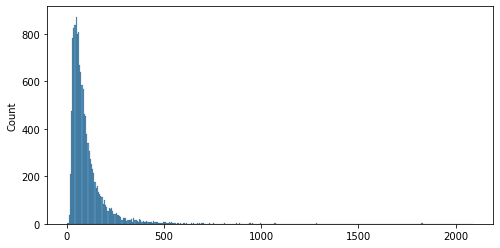

In [49]:
## visualize distribution of lengthsw
sns.histplot(seq_lens
        )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


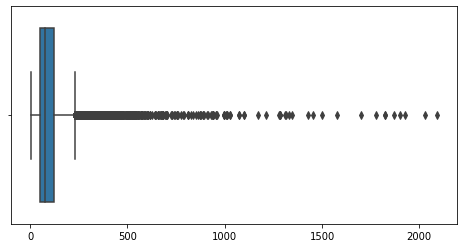

In [50]:
## What would be an approx cutoff for outliers?
sns.boxplot(seq_lens)

### 🎛 Setting Max Sequence Length

In [51]:
## Defining a max sequence length
MAX_SEQUENCE_LENGTH = 100
MAX_SEQUENCE_LENGTH

100

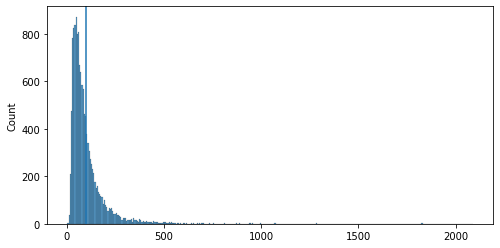

In [52]:
## Plot our cutoff
## visualize distribution of lengthsw
ax = sns.histplot(seq_lens)
ax.axvline(MAX_SEQUENCE_LENGTH)

In [53]:
## pad X_train_seq and X_test_seq
X_train_pad = sequence.pad_sequences(X_train_seq,MAX_SEQUENCE_LENGTH)
X_test_pad = sequence.pad_sequences(X_test_seq, MAX_SEQUENCE_LENGTH)

In [54]:
seq_lens = [len(x) for x in X_test_pad]
seq_lens[:10]

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

## 🏋️ Fitting Our First Model

#### Making Our Neural Networks

In [55]:
## Set the max words equal to tokenizer's word index
MAX_WORDS = len(tokenizer.word_index)
MAX_WORDS

100674

In [56]:
## Save num classes for final layer
n_classes = y_train.shape[1]
n_classes

3

In [57]:
EMBEDDING_SIZE

50

In [67]:
def make_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    model.add(layers.Embedding(MAX_WORDS+1, EMBEDDING_SIZE))
    model.add(layers.LSTM(25, return_sequences=False))
    # model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model

In [68]:
%%time
## make model and fit 
model= make_model()
history = model.fit(X_train_pad, y_train, batch_size=256, epochs=3,validation_split=0.2,
         workers=-1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 50)          5033750   
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 78        
Total params: 5,041,428
Trainable params: 5,041,428
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
99/99 [==============================] - 11s 92ms/step - loss: 0.9356 - accuracy: 0.5306 - recall: 0.2448 - val_loss: 0.7988 - val_accuracy: 0.6197 - val_recall: 0.4411
Epoch 2/3
99/99 [==============================] - 8s 79ms/step - loss: 0.6893 - accuracy: 0.6845 - recall: 0.6127 - val_loss: 0.7653 - val_accuracy: 0.6460 - val_recall: 0.5819
Epoch 3/3
99/99 [==============================] - 8s 77ms/step - loss: 0.5500 - accuracy: 0.7687 - recall: 0.7357 - val_loss: 0.7933 - val_accuracy: 0.6405 - val_recall: 0.6060
CPU times: user 40.6 s, sys: 1.76 s, total: 42.3 s
Wall time: 43.6 s


### Model Evaluation Functions

>- Below I broke down the larger evaluation function introduced in study group last week. 
    - I've created several helper functions to simplify the code for the evaluation function.
    - Additionally, we can now use those smaller functions when we don't need a full model evaluation

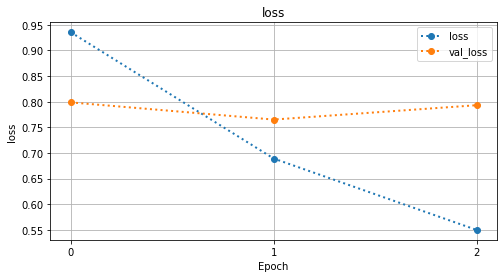

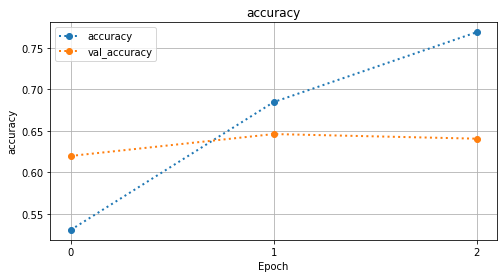

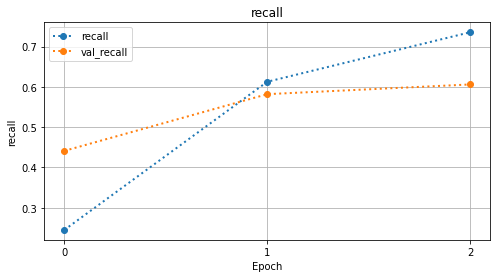

In [69]:
### BREAKING OUR BIG FUNCTION UP INTO HELPER FUNCTIONS
def plot_history(history,model,figsize=(8,4)):
    """Takes a keras history and model and plots 
    all metrics in separate plots for each metric"""
#     print(header,'\t[i] MODEL HISTORY',header,sep='\n')

    ## Make a dataframe out of history
    res_df = pd.DataFrame(history.history)#.plot()

    ## Plot Losses
    plot_kws = dict(marker='o',ls=':',lw=2,figsize=figsize)

    ## Plot all metrics
    metrics_list = model.metrics_names

    for metric in metrics_list:
        ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
        ax.set(xlabel='Epoch',ylabel=metric,title=metric)
        ax.grid()
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        plt.show()


## testing function
plot_history(history, model)

In [70]:
def evaluate_scores(model,X_train,y_train,label='Training',verbose=0):
    """Evaluates a keras model and prints the scores using the provided label."""
    train_scores  = model.evaluate(X_train,y_train,verbose=verbose)#score()
    for i,metric in enumerate(model.metrics_names):
        print(f"\t{label} {metric}: {train_scores[i]:.3f}")

evaluate_scores(model, X_train_pad,y_train,verbose=1)
evaluate_scores(model, X_test_pad,y_test,verbose=1,label='Test')

985/985 [==============================] - 6s 6ms/step - loss: 0.5086 - accuracy: 0.7996 - recall: 0.7725
	Training loss: 0.509
	Training accuracy: 0.800
	Training recall: 0.772
422/422 [==============================] - 3s 6ms/step - loss: 0.7911 - accuracy: 0.6423 - recall: 0.6004
	Test loss: 0.791
	Test accuracy: 0.642
	Test recall: 0.600


	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.53      0.69      0.60      4514
           1       0.68      0.46      0.55      4584
           2       0.77      0.79      0.78      4402

    accuracy                           0.64     13500
   macro avg       0.66      0.64      0.64     13500
weighted avg       0.66      0.64      0.64     13500




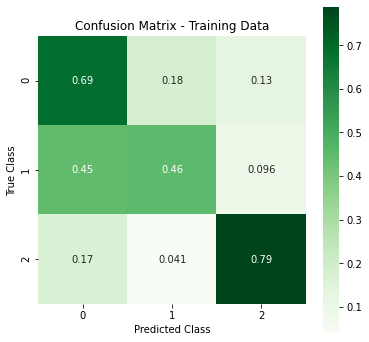

In [71]:
  def classification_report_cm(model, X_train,y_train,label='TRAINING DATA',
                            cm_figsize=(6,6),normalize='true',cmap='Greens'):
    """Gets predictions from a Keras neural network and get 
    classification report and confusion matrix."""
    ## Print report header, get preds, get class report, and conf matrix
    header =  '==='*24
    print(header,f"\t[i] CLASSIFICATION REPORT - {label}",header,sep='\n')
    print()
    
    ## Get predictions
    y_hat_train = model.predict(X_train)
    
    ## convert to 1D targets
    y_train_class =y_train.argmax(axis=1)
    y_hat_train_class = y_hat_train.argmax(axis=1)
    
    
    ## Get classification report 
    print(metrics.classification_report(y_train_class,y_hat_train_class))
    print()
    
    
    ## Plot the confusion Matrix
    cm = metrics.confusion_matrix(y_train_class, y_hat_train_class,
                                  normalize=normalize)
    
    fig,ax = plt.subplots(figsize=cm_figsize)
    sns.heatmap(cm, cmap=cmap, annot=True,square=True,ax=ax)
    ax.set(ylabel='True Class',xlabel='Predicted Class',
           title='Confusion Matrix - Training Data')    
    plt.show()

    
classification_report_cm(model,X_test_pad, y_test, label='TEST DATA')   

In [72]:
def evaluate_network(model, X_test, y_test, history=None, 
                        X_train = None, y_train = None,
                        history_figsize = (8,4), cm_figsize=(8,8),
                        cmap='Greens', normalize='true'):
    """Gets predictions and evaluates a classification model using
    sklearn.

    Args:
        model (classifier): a fit keras classification model.
        X_test (tensor/array): X data
        y_test (tensor/array): y data
        history (History object): model history from .fit
        X_train (tensor/array): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
                                
        history_figsize (tuple): figsize for each metric's history plot.
        cm_figsize (tuple): figsize for confusion matrix plot
      
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.  
    """
    
    header =  '==='*24
    
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')
        plot_history(history,model,figsize=history_figsize)
        
        
    ## Evaluate Network for loss/acc scores
    print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
    print()
    if X_train is not None:
        try:
            evaluate_scores(model,X_train,y_train,label='Training')
            print()

        except Exception as e:
            print("Error evaluating for accuracy for training data:")
            print(e)
        

    ## Evaluate test data
    evaluate_scores(model,X_test,y_test,label='Test')
    print("\n")

    
    ## Report for training data
    if X_train is not None:
        classification_report_cm(model, X_train, y_train, cmap=cmap,
                                 normalize=normalize,
                                 label='TRAINING DATA',cm_figsize=cm_figsize)       
        print('\n'*2)
    ## Report for test data
    classification_report_cm(model,X_test,y_test, cmap=cmap,
                             normalize=normalize,
                             label='TEST DATA',cm_figsize=cm_figsize)

    

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 50)          5033750   
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78        
Total params: 5,041,428
Trainable params: 5,041,428
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
197/197 [==============================] - 17s 77ms/step - loss: 0.8710 - accuracy: 0.5758 - recall: 0.3612 - val_loss: 0.7651 - val_accuracy: 0.6427 - val_recall: 0.5763
Epoch 2/3
197/197 [==============================] - 15s 74ms/step - loss: 0.6282 - accuracy: 0.7271 - recall: 0.6790 - val_loss: 0.7681 - val_accuracy: 0.6527 - val_recall: 0.6049
Epoch 3/3
197/197 [==============================] - 15s 74ms/step - loss: 0.4803 - accuracy: 0.8073 - recall: 0.7812 - val_loss: 0.8319 - val_accuracy: 0.6368 - val_recall: 0.6021
	[i] MODEL HISTORY


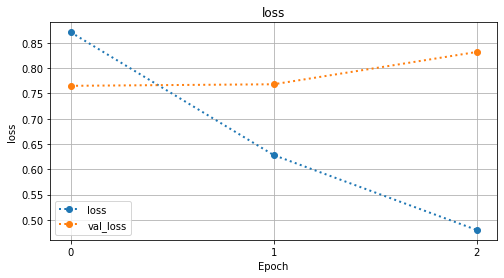

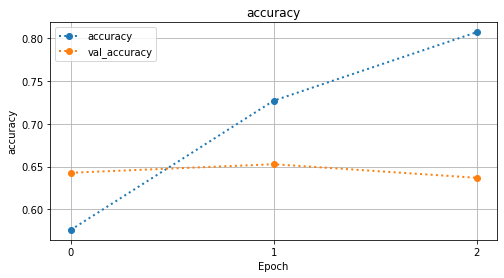

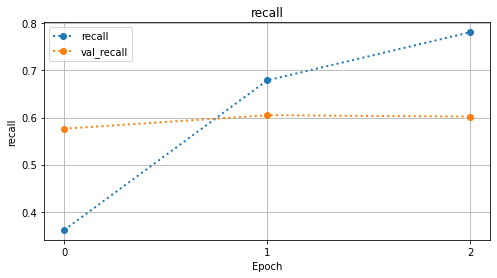

	[i] EVALUATING MODEL

	Training loss: 0.444
	Training accuracy: 0.834
	Training recall: 0.811

	Test loss: 0.826
	Test accuracy: 0.642
	Test recall: 0.606


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     10486
           1       0.84      0.77      0.80     10416
           2       0.91      0.91      0.91     10598

    accuracy                           0.83     31500
   macro avg       0.84      0.83      0.83     31500
weighted avg       0.84      0.83      0.83     31500




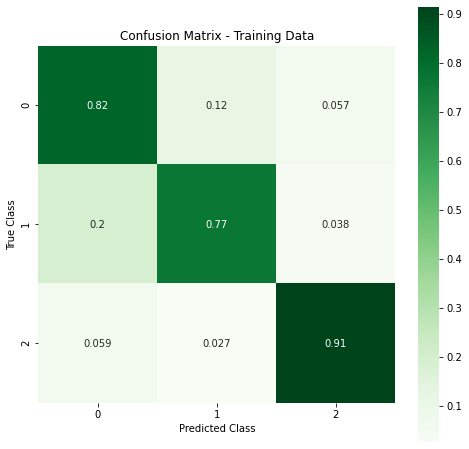




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.55      0.60      0.57      4514
           1       0.62      0.55      0.58      4584
           2       0.76      0.78      0.77      4402

    accuracy                           0.64     13500
   macro avg       0.64      0.64      0.64     13500
weighted avg       0.64      0.64      0.64     13500




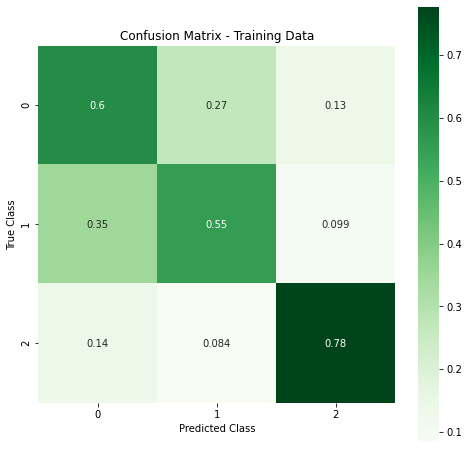

In [73]:
## make,fit model and evlaute
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=128, validation_split=0.2,
                   workers=-1)
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

>- **Q: Whats one thing we haven't addressed, as part of classification-modeling workflow?**
    - Dealing with class imbalance/

### Compute Class Weights

In [74]:
## check class balance
y_tr_classes = pd.Series(y_train.argmax(axis=1))
y_tr_classes.value_counts(1)

2    0.336444
0    0.332889
1    0.330667
dtype: float64

> Neural networks accept class weights, but cannot calculate them like sklearn models that accept `class_weight="balanced"`.
    - We can use sklearn's function to calculate the class weights to use in our neural netowork

In [75]:
from sklearn.utils.class_weight import compute_class_weight

## Get the array of weights for each unique class
weights= compute_class_weight(
           'balanced',
            np.unique(y_tr_classes),
            y_tr_classes)
weights

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2], y=0        0
1        2
2        0
3        2
4        0
        ..
31495    0
31496    0
31497    0
31498    1
31499    2
Length: 31500, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


array([1.00133511, 1.00806452, 0.99075297])

In [76]:
## Turn the weights into a dict with the class name as the key
weights_dict = dict(zip( np.unique(y_tr_classes),weights))
weights_dict

{0: 1.0013351134846462, 1: 1.0080645161290323, 2: 0.9907529722589168}

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 50)          5033750   
_________________________________________________________________
lstm_6 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 5,041,428
Trainable params: 5,041,428
Non-trainable params: 0
_________________________________________________________________


None

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/3
197/197 [==============================] - 18s 79ms/step - loss: 0.8776 - accuracy: 0.5601 - recall: 0.3330 - val_loss: 0.7806 - val_accuracy: 0.6327 - val_recall: 0.4835
Epoch 2/3
197/197 [==============================] - 15s 74ms/step - loss: 0.6512 - accuracy: 0.7111 - recall: 0.6546 - val_loss: 0.7583 - val_accuracy: 0.6567 - val_recall: 0.5986
Epoch 3/3
197/197 [==============================] - 15s 75ms/step - loss: 0.5040 - accuracy: 0.7930 - recall: 0.7629 - val_loss: 0.8244 - val_accuracy: 0.6430 - val_recall: 0.6056
	[i] MODEL HISTORY


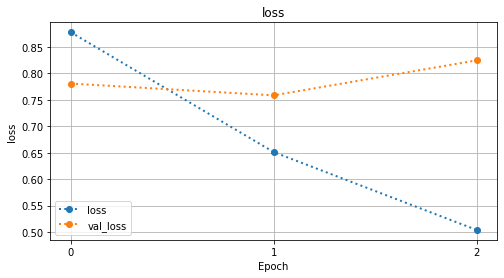

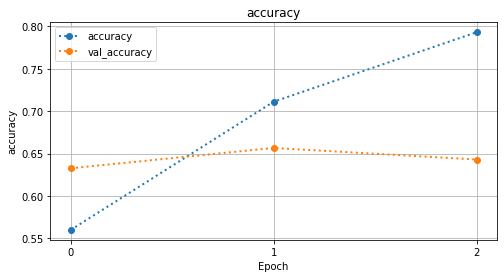

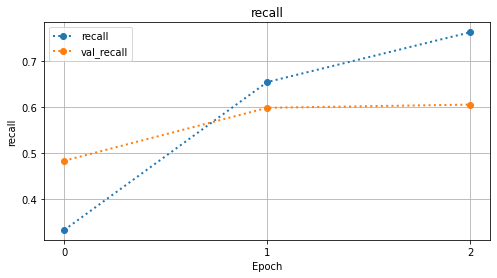

	[i] EVALUATING MODEL

	Training loss: 0.459
	Training accuracy: 0.827
	Training recall: 0.800

	Test loss: 0.822
	Test accuracy: 0.645
	Test recall: 0.606


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.75      0.81      0.78     10486
           1       0.84      0.74      0.79     10416
           2       0.89      0.92      0.91     10598

    accuracy                           0.83     31500
   macro avg       0.83      0.83      0.83     31500
weighted avg       0.83      0.83      0.83     31500




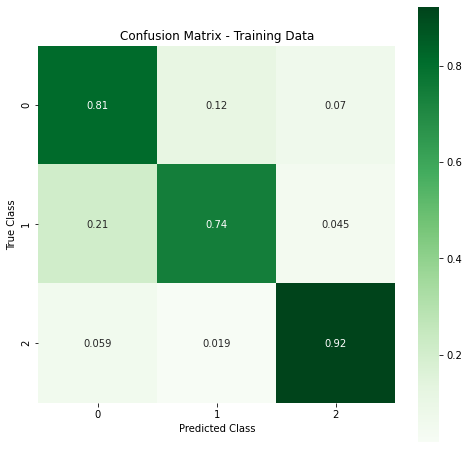




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.55      0.61      0.58      4514
           1       0.64      0.53      0.58      4584
           2       0.75      0.81      0.78      4402

    accuracy                           0.65     13500
   macro avg       0.65      0.65      0.64     13500
weighted avg       0.65      0.65      0.64     13500




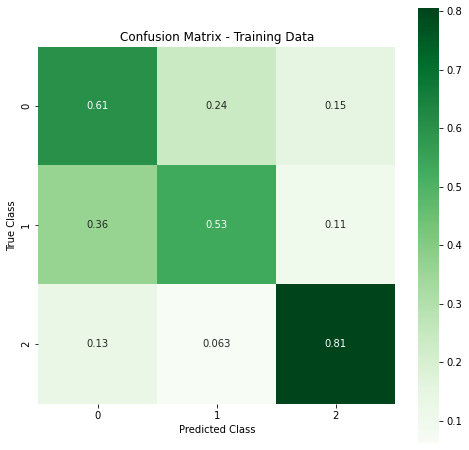

In [77]:
## make,fit model and evlaute
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=128, validation_split=0.2,
                   workers=-1,class_weight=weights_dict)
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

## 🏋️ Using our Previously Trained Word2Vec Embeddings in an Embedding Layer
- https://ppasumarthi-69210.medium.com/word-embeddings-in-keras-be6bb3092831

In [78]:
## Saving the total number of words as vocab size
vocab_size = len(tokenizer.index_word)

## Doubel check current embedding size and vocab size
vocab_size, EMBEDDING_SIZE

(100674, 50)

In [79]:
### make a metrix of embedding weights
embedding_matrix = np.zeros((vocab_size+1, EMBEDDING_SIZE))

## for each item in the word index
for word, i in tokenizer.word_index.items():

    ## if word in w2vec model, fill in the embedding matrix
     if word in wv:
        embedding_vector = wv[word]
        embedding_matrix[i] = embedding_vector
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29951933, -0.04440489,  1.52945948, ...,  2.05182099,
        -0.99803013,  1.36847579],
       [ 0.45080757,  1.17883754,  1.29203486, ...,  1.14678228,
        -0.58327353, -1.50838339],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [80]:
## Make a keras embedding layer with emebdding_matrix
embedding_layer = layers.Embedding(vocab_size+1,EMBEDDING_SIZE,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)

### 🏋️ Copy This cell!

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 50)           5033750   
_________________________________________________________________
lstm_7 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 5,041,428
Trainable params: 7,678
Non-trainable params: 5,033,750
_________________________________________________________________


None

Epoch 1/3
197/197 [==============================] - 5s 15ms/step - loss: 0.9785 - accuracy: 0.4923 - recall: 0.2621 - val_loss: 0.8942 - val_accuracy: 0.5563 - val_recall: 0.4241
Epoch 2/3
197/197 [==============================] - 2s 12ms/step - loss: 0.8404 - accuracy: 0.5954 - recall: 0.4660 - val_loss: 0.8382 - val_accuracy: 0.5976 - val_recall: 0.4778
Epoch 3/3
197/197 [==============================] - 2s 12ms/step - loss: 0.8014 - accuracy: 0.6254 - recall: 0.5245 - val_loss: 0.8116 - val_accuracy: 0.6108 - val_recall: 0.5227
	[i] MODEL HISTORY


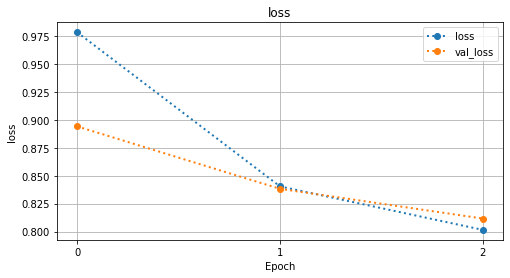

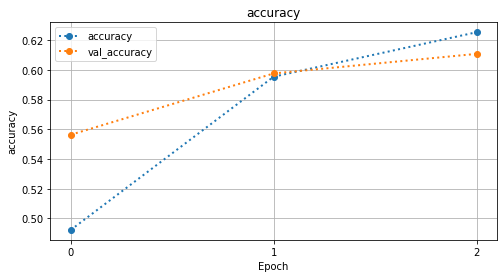

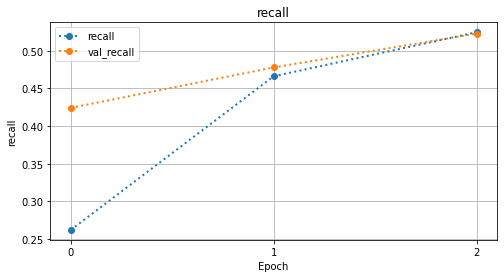

	[i] EVALUATING MODEL

	Training loss: 0.778
	Training accuracy: 0.637
	Training recall: 0.549

	Test loss: 0.809
	Test accuracy: 0.611
	Test recall: 0.519


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.55      0.58      0.56     10486
           1       0.62      0.52      0.56     10416
           2       0.73      0.82      0.77     10598

    accuracy                           0.64     31500
   macro avg       0.63      0.64      0.63     31500
weighted avg       0.63      0.64      0.63     31500




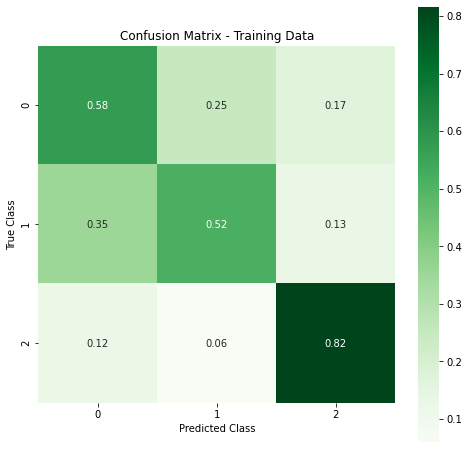




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.51      0.57      0.54      4514
           1       0.61      0.47      0.53      4584
           2       0.72      0.80      0.75      4402

    accuracy                           0.61     13500
   macro avg       0.61      0.61      0.61     13500
weighted avg       0.61      0.61      0.61     13500




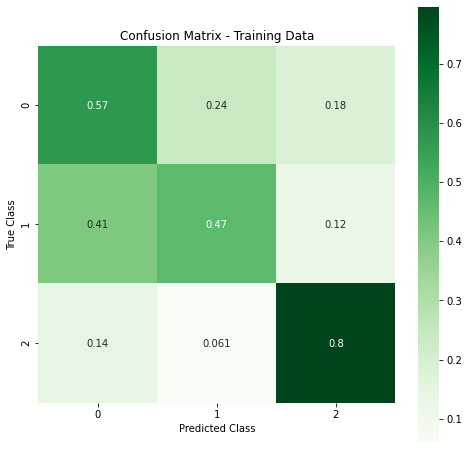

In [81]:
## update our make_model_w2v func wth embedding layer
def make_w2v_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    embedding_layer = layers.Embedding(vocab_size+1,EMBEDDING_SIZE,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)
    model.add(embedding_layer)
#     model.add(layers.Embedding(MAX_WORDS+1, EMBEDDING_SIZE))
    model.add(layers.LSTM(25, return_sequences=False))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model

## make,fit model and evlaute
model = make_w2v_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=128, validation_split=0.2,
                   workers=-1,class_weight=weights_dict)
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

# 📚 Overview  - Neural Network Tuning 

## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is partially based on the blog post below. 
- However, I ordered the steps with my recommended order of importance/what-to-tune-first
- [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters 

- Note: outline below is meant for Dense layers but will also generally be true for other layer types.

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.

7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons



### Easy-to-Add options to fight overfitting

#### Dropout 
<img src="https://raw.githubusercontent.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/master/Phase_4/topic_40-41_neural_networks/CL%20Repos/ds-neural_network_architecture-video/img/drop_out.png">

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
<!--     

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  
 -->

<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

# 🕹 Activity Part 2: Tuning Our Neural Network

## Adding Callbacks

### Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `tensorflow.keras.callbacks.EarlyStopping`[ALWAYS!]
  - `tensorflow.keras.callbacks.ModelCheckpoint` [Always, if on Colab]

- Callbacks worth further exploration
 - `tensorflow.keras.callbacks.callbacks.LearningRateScheduler`
     - May be outdated in tf 2.x

In [85]:
## import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [ ]:
'/gdrive/MyDrive/Datasets/0222221_sg/'

In [86]:
## Make folder for models
model_folder = '/gdrive/MyDrive/Datasets/0222221_sg/'
os.makedirs(model_folder,exist_ok=True)
os.listdir(model_folder)

[]

In [87]:
## make checkpoints - early stopping and modelcheckpoint
early_stop = EarlyStopping(monitor='val_accuracy',patience=2,verbose=1,
                          restore_best_weights=False)

checkpoint = ModelCheckpoint(model_folder,verbose=0,save_best_only=True)

In [ ]:
### You can use {} to insert values in your checkpoint names
# filepath=folder+"weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath,verbose=1,save_best_only=True,
#                             save_weights_only=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 50)           5033750   
_________________________________________________________________
lstm_8 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 78        
Total params: 5,041,428
Trainable params: 7,678
Non-trainable params: 5,033,750
_________________________________________________________________


None

Epoch 1/5
197/197 [==============================] - 5s 15ms/step - loss: 0.9615 - accuracy: 0.5063 - recall: 0.2734 - val_loss: 0.8630 - val_accuracy: 0.5775 - val_recall: 0.4278


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


Epoch 2/5
197/197 [==============================] - 2s 12ms/step - loss: 0.8297 - accuracy: 0.6047 - recall: 0.4819 - val_loss: 0.8158 - val_accuracy: 0.6073 - val_recall: 0.4989


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


Epoch 3/5
197/197 [==============================] - 2s 12ms/step - loss: 0.7949 - accuracy: 0.6260 - recall: 0.5339 - val_loss: 0.7994 - val_accuracy: 0.6187 - val_recall: 0.5379


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


Epoch 4/5
197/197 [==============================] - 2s 12ms/step - loss: 0.7691 - accuracy: 0.6419 - recall: 0.5608 - val_loss: 0.7888 - val_accuracy: 0.6273 - val_recall: 0.5456


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


Epoch 5/5
197/197 [==============================] - 2s 12ms/step - loss: 0.7513 - accuracy: 0.6526 - recall: 0.5788 - val_loss: 0.7796 - val_accuracy: 0.6368 - val_recall: 0.5678


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/assets


	[i] MODEL HISTORY


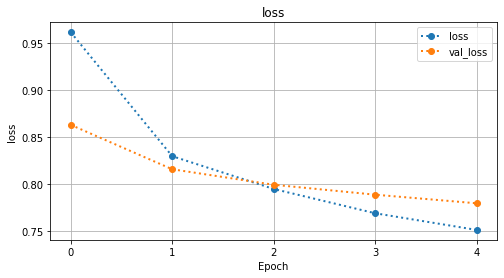

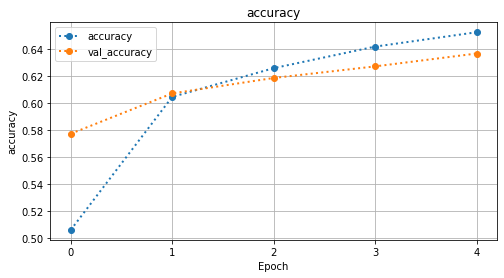

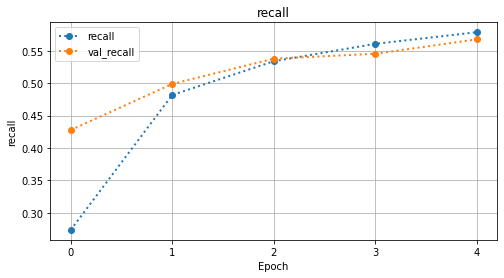

	[i] EVALUATING MODEL

	Training loss: 0.738
	Training accuracy: 0.658
	Training recall: 0.590

	Test loss: 0.783
	Test accuracy: 0.627
	Test recall: 0.552


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.58      0.55      0.56     10486
           1       0.62      0.58      0.60     10416
           2       0.75      0.84      0.80     10598

    accuracy                           0.66     31500
   macro avg       0.65      0.66      0.65     31500
weighted avg       0.65      0.66      0.65     31500




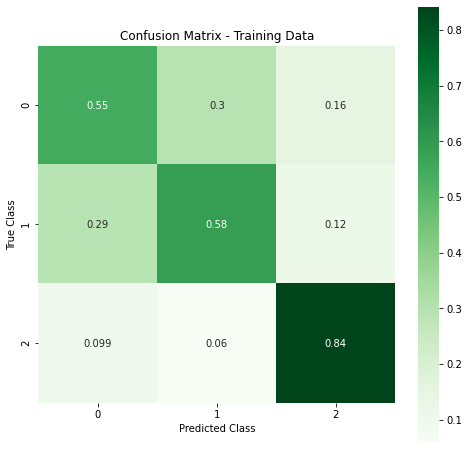




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      4514
           1       0.60      0.54      0.57      4584
           2       0.72      0.81      0.77      4402

    accuracy                           0.63     13500
   macro avg       0.62      0.63      0.62     13500
weighted avg       0.62      0.63      0.62     13500




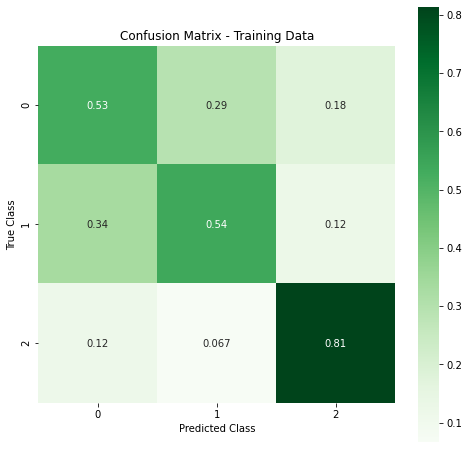

In [88]:
## paste in our prior model function and fitting/eval code, but add callbacks

## update our make_model_w2v func wth embedding layer
def make_w2v_model():
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    embedding_layer = layers.Embedding(vocab_size+1,EMBEDDING_SIZE,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=False)
    model.add(embedding_layer)
    model.add(layers.LSTM(25, return_sequences=False))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model

## make,fit model and evlaute
model = make_w2v_model()
history = model.fit(X_train_pad, y_train, epochs=5,
                    batch_size=128, validation_split=0.2,
                   workers=-1,class_weight=weights_dict,callbacks=[early_stop,checkpoint])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

## 📚 Saving and Loading Models
#### Our model Checkpooint saved the best model in the model folder we specified

In [103]:
os.listdir(model_folder)

['variables', 'assets', 'saved_model.pb', 'keras_metadata.pb', 'my_model']

In [93]:
ls /gdrive/MyDrive/Datasets/0222221_sg/

assets/  keras_metadata.pb  saved_model.pb  variables/


### Saving Models manually

In [101]:
## making new folder for just our manually saved model
saved_model_folder = model_folder+'my_model'
os.makedirs(saved_model_folder)
saved_model_folder

'/gdrive/MyDrive/Datasets/0222221_sg/my_model'

In [102]:
model.save(f"{saved_model_folder}/final_model")

INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/my_model/final_model/assets


INFO:tensorflow:Assets written to: /gdrive/MyDrive/Datasets/0222221_sg/my_model/final_model/assets


In [ ]:
# 

### Loading Models

#### Loading Manually Saved Model

In [104]:
os.listdir(saved_model_folder)

['final_model']

	[i] MODEL HISTORY


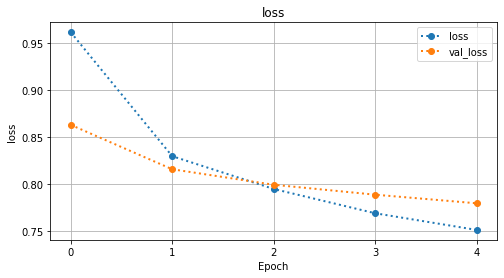

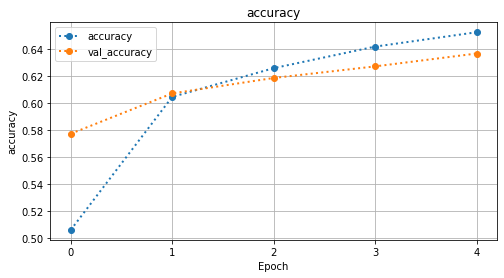

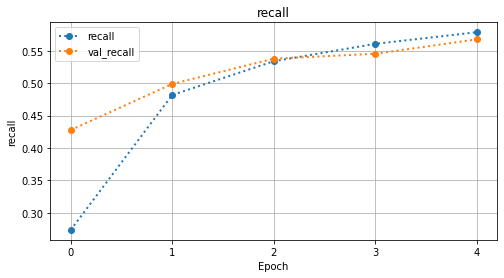

	[i] EVALUATING MODEL

	Training loss: 0.738
	Training accuracy: 0.658
	Training recall: 0.590

	Test loss: 0.783
	Test accuracy: 0.627
	Test recall: 0.552


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.58      0.55      0.56     10486
           1       0.62      0.58      0.60     10416
           2       0.75      0.84      0.80     10598

    accuracy                           0.66     31500
   macro avg       0.65      0.66      0.65     31500
weighted avg       0.65      0.66      0.65     31500




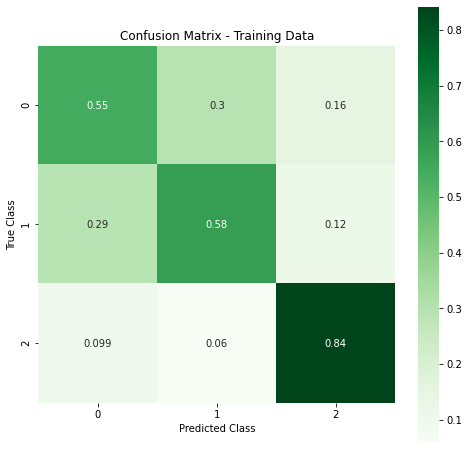




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      4514
           1       0.60      0.54      0.57      4584
           2       0.72      0.81      0.77      4402

    accuracy                           0.63     13500
   macro avg       0.62      0.63      0.62     13500
weighted avg       0.62      0.63      0.62     13500




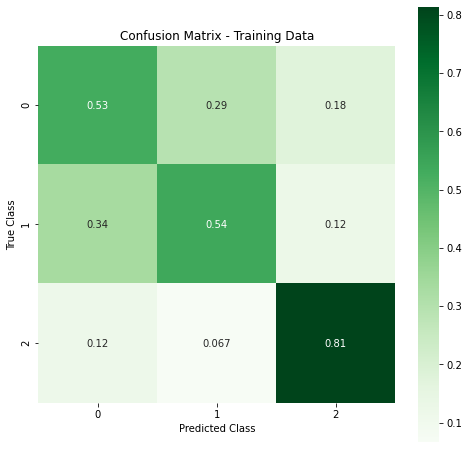

In [109]:
manually_saved_model = tf.keras.models.load_model(saved_model_folder+'/final_model/',)
evaluate_network(manually_saved_model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

#### Loading Model Saved from model checkpoint callback

	[i] MODEL HISTORY


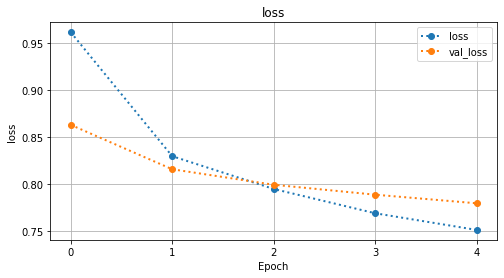

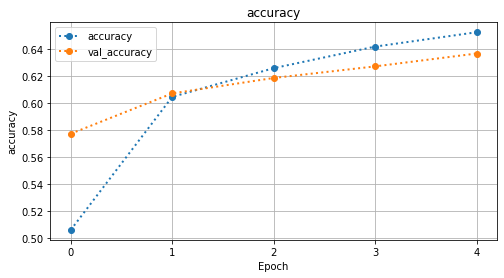

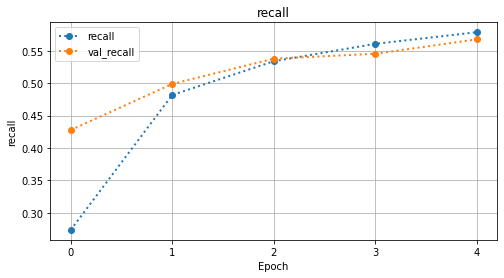

	[i] EVALUATING MODEL

	Training loss: 0.738
	Training accuracy: 0.658
	Training recall: 0.590

	Test loss: 0.783
	Test accuracy: 0.627
	Test recall: 0.552


	[i] CLASSIFICATION REPORT - TRAINING DATA

              precision    recall  f1-score   support

           0       0.58      0.55      0.56     10486
           1       0.62      0.58      0.60     10416
           2       0.75      0.84      0.80     10598

    accuracy                           0.66     31500
   macro avg       0.65      0.66      0.65     31500
weighted avg       0.65      0.66      0.65     31500




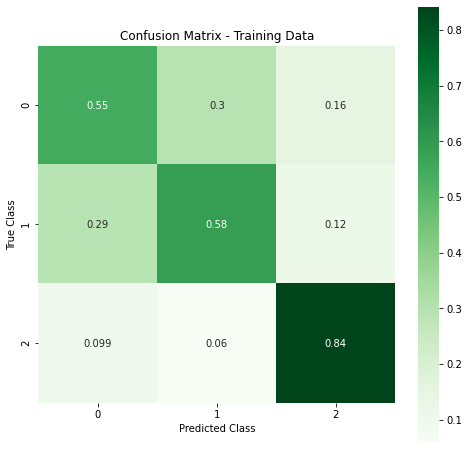




	[i] CLASSIFICATION REPORT - TEST DATA

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      4514
           1       0.60      0.54      0.57      4584
           2       0.72      0.81      0.77      4402

    accuracy                           0.63     13500
   macro avg       0.62      0.63      0.62     13500
weighted avg       0.62      0.63      0.62     13500




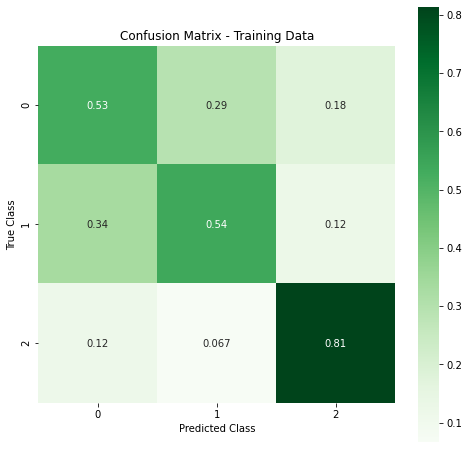

In [92]:
checkpoint_model = tf.keras.models.load_model('/gdrive/MyDrive/Datasets/0222221_sg/')
evaluate_network(checkpoint_model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

# 📚 Gridsearching with Keras & Scikit-Learn

## HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    
<!-- 
```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```     -->

2. We then create out model using the Keras wrapper:

```python
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

### 🎛 Defining Build Function and Params Grid

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# make a new make_tune_model function to tune the # of units
# and if embeddings are trainable
def make_tune_model(n_units_lstm=25, trainable=False):
    """Make a neural network with a new emebdding layer, 
    an LSTM layer with 25 unit, and a final Dense layer appropriate for the task"""
    model = models.Sequential()
    embedding_layer = layers.Embedding(vocab_size+1,EMBEDDING_SIZE,
                                  weights=[embedding_matrix],
                                  input_length=MAX_SEQUENCE_LENGTH,
                                  trainable=trainable)
    model.add(embedding_layer)
    model.add(layers.LSTM(n_units_lstm, return_sequences=False))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    display(model.summary())
    return model


In [ ]:
# ## make a model with sklearn wrapper
# wrapped_model = KerasClassifier(make_tune_model)
# wrapped_model.fit(X_train_pad,y_train, 
#                   epochs=3, validation_split=0.2)

In [ ]:
## make anew early stopping with shorter patience, do not restore best weights
early_stop = EarlyStopping(monitor='val_accuracy',patience=0,verbose=1,
                          restore_best_weights=False)

In [ ]:
## Set up params grid for 25,509 units and trianable true/false

## Set up params grid for 25,509 units and trianable true/false
params = {'n_units_lstm':[25,50],
         'trainable':[True,False]}


## Make and fit grid, check best params
grid = GridSearchCV(KerasClassifier(make_tune_model), 
                    params,cv=2,n_jobs=-1,verbose=1)

grid.fit(X_train_pad,y_train, epochs=3, 
         callbacks=[early_stop],
         validation_split=0.2)

grid.best_params_

In [ ]:
## whats the best score?
best_ann = grid.best_estimator_
history = best_ann.fit(X_train_pad,y_train, epochs=3, 
         callbacks=[early_stop],
         validation_split=0.2)

In [ ]:
best_ann.model

In [ ]:
evaluate_network(best_ann.model,X_test_pad,y_test,history=history,
                 X_train=X_train_pad,y_train = y_train)

In [ ]:
raise Exception('The following cells are not guaranteed to run!')

# 🗄 APPENDIX

## 🤔 Tensorboard Callback
- https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks

> Add tensorboard callback

In [ ]:
%load_ext tensorboard
logdir = './logs/'
os.makedirs(logdir,exist_ok=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [ ]:
## Test using function to train and evaluate
model = make_model()
history = model.fit(X_train_pad, y_train, epochs=3,
                    batch_size=64, validation_split=0.2,
                   workers=-1,callbacks=[tensorboard_callback])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

In [ ]:
# %tensorboard --logdir logs

## Visualizing Neural Networks

- [Blog Post Guide](https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e)
- [Official `AnnVisualizer` Repo](https://github.com/RedaOps/ann-visualizer)

In [ ]:
# !pip3 install keras
!pip install ann_visualizer
!pip install graphviz

In [ ]:
model = make_w2v_model()
history = model.fit(X_train_pad, y_train, epochs=5,
                    batch_size=128, validation_split=0.2,
                   workers=-1,class_weight=weights_dict,callbacks=[early_stop])
evaluate_network(model,X_test_pad,y_test,history,
                X_train = X_train_pad,y_train=y_train)

In [ ]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

## 🤔 Using Pre-Trained Vectors

### On Colab

>- [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/) - official website with documentation. 
    - There are several different pretrained vectors available. We will use the default/starter set of vectors, but you could select a different link to download an alternative option
        - Recommended link: http://nlp.stanford.edu/data/glove.6B.zip

>- [Tutorial on using Glove with Colab](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/nlp/ipynb/pretrained_word_embeddings.ipynb#scrollTo=b_H-URXmROE6)

In [82]:
# glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
# !wget {glove_url}
!unzip -q glove.6B.zip

In [83]:
## Delete the zip file
!rm glove.6B.zip

In [84]:
# path_to_glove_file = os.path.join(
#     os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
# )
path_to_glove_file = "glove.6B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


### Local Code

In [ ]:
# import os
# folder = '/Users/jamesirving/Datasets/'#glove.twitter.27B/'
# # print(os.listdir(folder))
# glove_file = folder+'glove.6B/glove.6B.50d.txt'#'glove.twitter.27B.50d.txt'
# glove_twitter_file = folder+'glove.twitter.27B/glove.twitter.27B.50d.txt'
# print(glove_file)
# print(glove_twitter_file)

#### Keeping only the vectors needed

In [ ]:
# ## This line of code for getting all words bugs me
# total_vocabulary = set(word for tweet in data_lower for word in tweet)
# len(total_vocabulary)

In [ ]:
# glove = {}
# with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
#     for line in f:
#         parts = line.split()
#         word = parts[0].decode('utf-8')
#         if word in total_vocabulary:
#             vector = np.array(parts[1:], dtype=np.float32)
#             glove[word] = vector

In [ ]:
# glove['republican']

### Converting Glove to Word2Vec format

- Getting glove into w2vec format:
    - https://radimrehurek.com/gensim/scripts/glove2word2vec.html

In [ ]:
glove_folder = folder+'glove.twitter.27B'
os.listdir(glove_folder)

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(glove_twitter_file)
tmp_file = get_tmpfile(glove_folder+'glove_to_w2vec.txt')
_ = glove2word2vec(glove_file, tmp_file)
model_glove = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
model_glove.wv

## LSTM vs GRU

In [ ]:
## GRU Model
from keras import models, layers, optimizers, regularizers
modelG = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
modelG.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))

# modelG.add(layers.SpatialDropout1D(0.5))
# modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
modelG.add(layers.Dense(2, activation='softmax'))

modelG.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
modelG.summary()

In [ ]:

history = modelG.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_hat_test = modelG.predict_classes(X_test)
kg.evaluate_model(y_test,y_hat_test,history)

## Using Embeddings in Classification Models - sci-kit learn

- Embeddings can be used in Artificial Neural Networks as an input Embedding Layer
- Embeddings can be used in sci-kit learn models by taking the mean vector of a text/document and using the mean vector as the input into the model. 

### Creating Mean Embeddings

In [ ]:
## This line of code for getting all words bugs me
total_vocabulary = set(word for tweet in data_lower for word in tweet)
len(total_vocabulary)

In [ ]:
glove = {}
with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [ ]:
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

y = pd.get_dummies(df['is_trump'],drop_first=True).values
X = df['text'].str.lower().map(word_tokenize)

X_idx = list(range(len(X)))
train_idx,test_idx = train_test_split(X_idx,random_state=123)

X[train_idx]

In [ ]:
def train_test_split_idx(X, y, train_idx,test_idx):
    # try count vectorized first
    X_train = X[train_idx].copy()
    y_train = y[train_idx].copy()
    X_test = X[train_idx].copy()
    y_test = y[train_idx].copy()
    return X_train, X_test,y_train, y_test

X_train, X_test,y_train, y_test = train_test_split_idx(X,y,train_idx,test_idx)

In [ ]:
# df['combined_text'] = df['headline'] + ' ' + df['short_description']
# data = df['combined_text'].map(word_tokenize).values

In [ ]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])